<a href="https://colab.research.google.com/github/ftornay/TFG/blob/master/termo_learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
from fastai.vision import *
from pathlib import Path

In [3]:
# Activar drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
from termo_utils import open_npy_image
vision.data.open_image = open_npy_image

In [0]:
!mkdir imagenes
DIR_IM = Path('imagenes')
DIR_DATA = Path('/content/drive/My Drive/Datos')

In [6]:
from termo_utils import make_list_dfs
data_list = make_list_dfs()
tars = [(DIR_DATA/(t+'.tar.gz'), DIR_DATA/(v+'.tar.gz'))for t, v in data_list]
databunches = [db.name for db in DIR_DATA.glob('*.pkl')]
tars, databunches

([(PosixPath('/content/drive/My Drive/Datos/datos_train_1.tar.gz'),
   PosixPath('/content/drive/My Drive/Datos/datos_valid_1.tar.gz')),
  (PosixPath('/content/drive/My Drive/Datos/datos_train_2.tar.gz'),
   PosixPath('/content/drive/My Drive/Datos/datos_valid_2.tar.gz')),
  (PosixPath('/content/drive/My Drive/Datos/datos_train_3.tar.gz'),
   PosixPath('/content/drive/My Drive/Datos/datos_valid_3.tar.gz')),
  (PosixPath('/content/drive/My Drive/Datos/datos_train_4.tar.gz'),
   PosixPath('/content/drive/My Drive/Datos/datos_valid_1.tar.gz')),
  (PosixPath('/content/drive/My Drive/Datos/datos_train_5.tar.gz'),
   PosixPath('/content/drive/My Drive/Datos/datos_valid_2.tar.gz')),
  (PosixPath('/content/drive/My Drive/Datos/datos_train_6.tar.gz'),
   PosixPath('/content/drive/My Drive/Datos/datos_valid_3.tar.gz'))],
 ['termo_db_0_1.pkl',
  'termo_db_1_1.pkl',
  'termo_db_2_1.pkl',
  'termo_db_3_1.pkl',
  'termo_db_4_1.pkl',
  'termo_db_5_1.pkl'])

In [0]:
def shellquote(s):
  """ Escapes string so as to pass it to system shell """
  s = str(s)
  return "'" + s.replace("'", "'\\''") + "'"

In [8]:
!rm imagenes/*
data_ind = 0
for i in tars[data_ind]:
  !tar -C imagenes -xvf {shellquote(i)} --strip-components 5

rm: cannot remove 'imagenes/*': No such file or directory
media/ftornay/Maxtor/Termo_data/imagenes/Jno56s2I_00016.npy
media/ftornay/Maxtor/Termo_data/imagenes/fut0016_00700.npy
media/ftornay/Maxtor/Termo_data/imagenes/sujeto25s20001_00050.npy
media/ftornay/Maxtor/Termo_data/imagenes/fut0087_00376.npy
media/ftornay/Maxtor/Termo_data/imagenes/Jno26s1I_00139.npy
media/ftornay/Maxtor/Termo_data/imagenes/Ano53s1H_00181.npy
media/ftornay/Maxtor/Termo_data/imagenes/Ano43s1H_00570.npy
media/ftornay/Maxtor/Termo_data/imagenes/fut0007_00746.npy
media/ftornay/Maxtor/Termo_data/imagenes/fut0085_00162.npy
media/ftornay/Maxtor/Termo_data/imagenes/Ano42s1I_00392.npy
media/ftornay/Maxtor/Termo_data/imagenes/sujeto28s20001_00026.npy
media/ftornay/Maxtor/Termo_data/imagenes/aleman0003_00025.npy
media/ftornay/Maxtor/Termo_data/imagenes/Ano2s2IC_00007.npy
media/ftornay/Maxtor/Termo_data/imagenes/aleman0036_00042.npy
media/ftornay/Maxtor/Termo_data/imagenes/Jno51s2HR_00182.npy
media/ftornay/Maxtor/Termo_da

In [9]:
# Recargar databunch
db = load_data(DIR_DATA, databunches[data_ind]).normalize(imagenet_stats)
len(db.train_ds), len(db.valid_ds)

(6000, 3000)

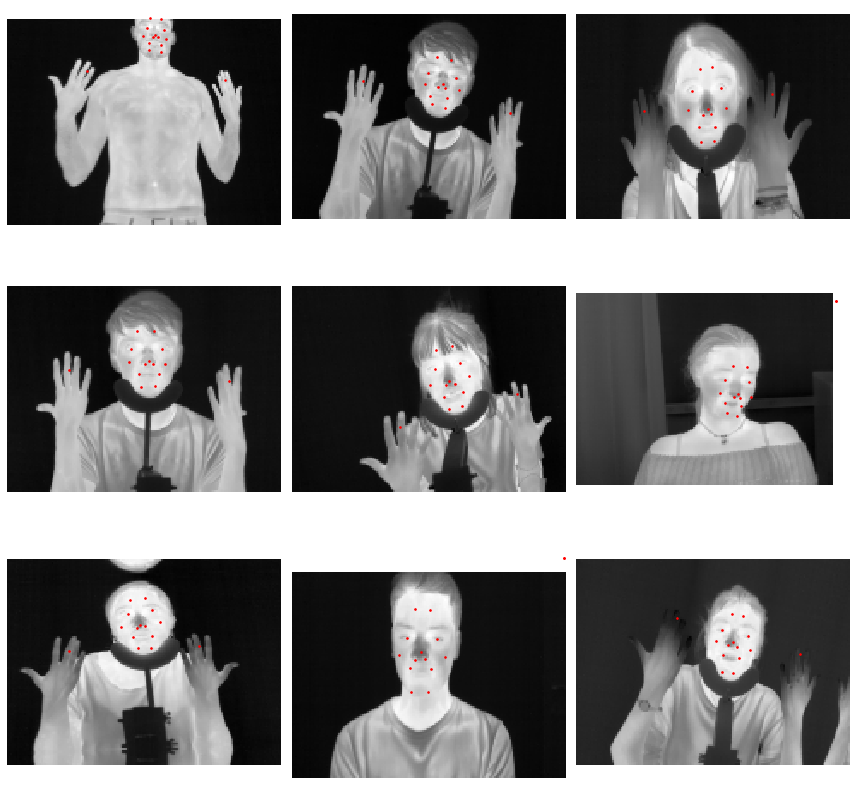

In [10]:
db.show_batch(3)

In [11]:
learn = cnn_learner(db, models.resnet34, pretrained=False)
learn.load(DIR_DATA/'termo_model_stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (6000 items)
x: PointsItemList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: PointsLabelList
ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160)
Path: imagenes;

Valid: LabelList (3000 items)
x: PointsItemList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: PointsLabelList
ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160)
Path: imagenes;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Basi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


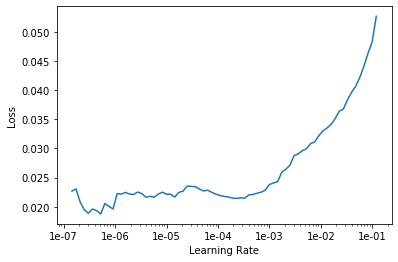

In [0]:
learn.lr_find()
learn.recorder.plot(skip_start=2, skip_end=2) # Mostrar más valores del final de los que hay por defecto

In [0]:
lr = 1e-05 # Update!

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
0,0.030536,0.021984,01:23
1,0.028504,0.022153,00:37
2,0.025598,0.020238,00:37
3,0.022445,0.019761,00:36
4,0.021519,0.020089,00:36


In [0]:
learn.save(DIR_DATA/'termo_model_stage-1')

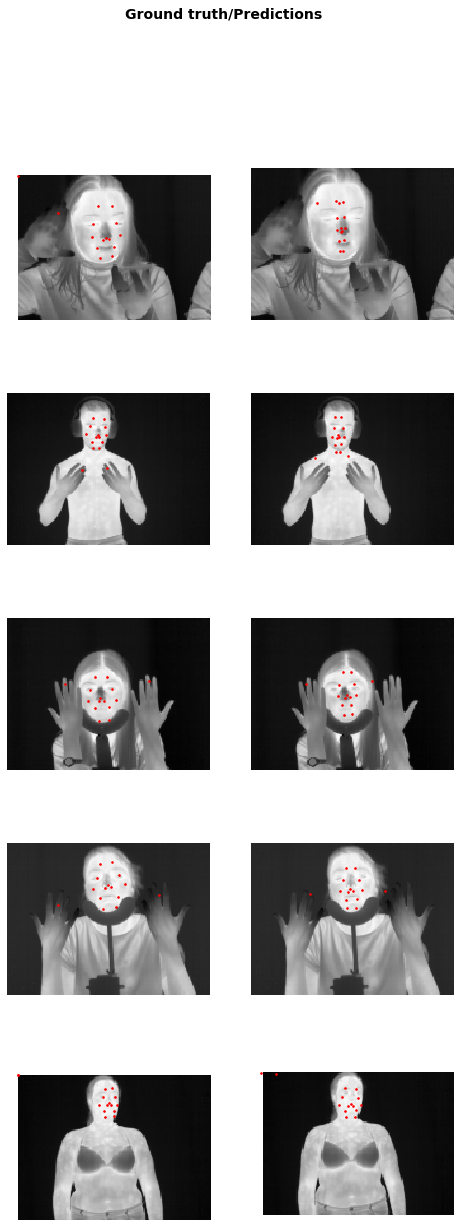

In [12]:
learn.load(DIR_DATA/'termo_model_stage-2')
learn.show_results()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(lr/100, lr/10))

epoch,train_loss,valid_loss,time
0,0.021848,0.017963,01:29
1,0.021793,0.018518,00:45
2,0.021637,0.019171,00:46
3,0.020884,0.018975,00:45
4,0.021362,0.018219,00:46
5,0.020438,0.017722,00:45
6,0.020976,0.018520,00:45
7,0.021008,0.018122,00:45
8,0.021419,0.018591,00:45
9,0.021711,0.018454,00:46


In [0]:
learn.save(DIR_DATA/'termo_model_stage-2')
learn.load(DIR_DATA/'termo_model_stage-2')

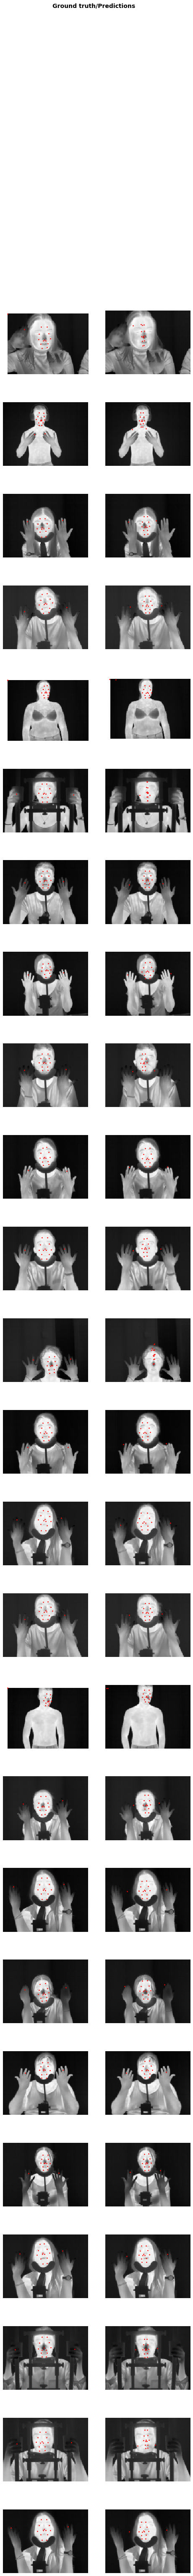

In [13]:
learn.show_results(rows=25)

In [0]:
learn.export(DIR_DATA/'termo_model_trained_1.pkl')